**Materiály vznikají průběžně a jsou bez záruky - prosím o report chyb :-)**

In [2]:
import numpy as np
from scipy.stats.distributions import uniform, expon, norm
import matplotlib.pylab as plt

# Téma 4: Spojité náhodné veličiny

Už víme, že náhodné veličiny mohou z hlediska oboru hodnot být

- **diskrétní** - nabývají hodnot z nejvýše spočetné množiny $\{x_1,x_2,\ldots\}$. Teoreticky můžeme pro všechna $k=1,2,\ldots$ kvantifikovat pravděpodobnost jednotlivých hodnot $P(X=x_k)$.
- **spojité** - veličina $X$ nabývá nespočetně mnoha možných hodnot, žije na nějakém kontinuu, např. množině reálných čísel $\mathbb{R}$ či libovolné její podmnožině (intervalu). Nelze pro hodnoty $x$ kvantifikovat jejich pravděpodobnost $P(X=x)$, neboť (i) takových bodů je v kontinuu nekonečno, ale pravděpodobnosti se musejí nakumulovat do jedničky a (ii) bod kontinua má míru nula (vzpomeňte na definici náhodné veličiny). Jde to podchytit i intuitivně - jaká je pravděpodobnost, že vybraná slečna bude mít 1.7 metru s nekonečnou přesností?

*Kdybychom uměli trochu více s mírou, řekli bychom si, že u diskrétních veličin používáme aritmetickou a u spojitých Lebesgueovu a operace by nám zůstaly pro oba případy stejné, protože to je právě míra, která říká, jak s tím naložit...*

**Úkol: vymyslete pár příkladů diskrétních a spojitých veličin.**

> **Definice**
>
> Náhodná veličina $X$ s hodnotami $x$ se nazývá spojitá, jestliže existuje nezáporná funkce $f_X(x)$ taková, že pro každé $x\in\mathbb{R}$ můžeme distribuční funkci $F_X(x)$ vyjádřit jako
>
> $$
F_X(x) = P(X\leq x) = \int_{-\infty}^x f_X(t)dt.
$$

Funkce $f_X$ se nazývá hustotou pravděpodobnosti náhodné veličiny $X$. Platí, celkem zřejmě, že

$$
f_X(x) = \frac{dF_X(x)}{dx}.
$$

Podíváme-li se na hustotu a distribuční funkci, jakou hodnotu bude mít následující integrál?

$$
\int_{-\infty}^{\infty} f_X(x) dx
$$

(samozřejmě 1, je to normalizační podmínka: pravděpodobnosti se sčítají/integrují do jedné)

*Vzpomeňte - integrál je vlastně něco, jako "suma přes kontinuum", nasčítává maličké sloupečky v grafu. Zde je vidět ta aplikace míry - v diskrétním případě sčítáme, ve spojitém také sčítáme, ale kvůli kontinuu si s obyčejnou sumou nevystačíme. A nebo naopak, ta suma ve spojitém případě je také integrál, jen s jinou mírou :)*

![cdf](img/cdf.jpg)

Stejně, jako v diskrétním případě, i zde tedy platí, že distribuční funkce jsou "nakumulované" pravděpodobnosti. A celkem logicky platí i pravidla pro počítání pravděpodobnosti nějaké množiny, $P(X\in(a,b])$. Zamyslete se, jak by to bylo s intervaly $[a,b], (a,b), [a,b)$.

![cdf2](img/cdf-pst.jpg)

## Hustota pravděpodobnosti a distribuční funkce spojité veličiny

Hustota pravděpodobnosti říká, jak je pravděpodobnost rozdělena mezi hodnoty náhodné veličiny. Neříká ale, jaká je pravděpodobnost jednotlivých hodnot této veličiny - tento rozdíl je nutné mít na paměti.

Pamatujete si, jak jsme z empirických četností a kumulativních empirických četností přecházeli v limitě k pravděpodobnostní a distribuční funkci? Tady je to stejné, jen bychom malovali histogram a kumulativní histogram a zmenšovali šířku obdélníčků. V limitě bychom se dostali k příslušným funkcím :)

Podívejme se na to názorně - který obrázek vyjadřuje kterou funkci?

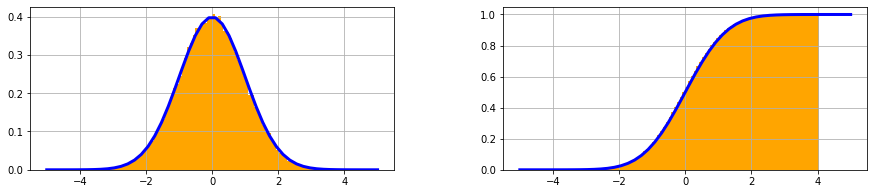

In [11]:
nbins = 100     ### Zkuste měnit
plt.figure(figsize=(15,3))
x = norm.rvs(size=100000)
plt.subplot(1,2,1)
plt.hist(x, bins=nbins, density=True, color='orange')
xx = np.linspace(-5,5)
plt.plot(xx, norm.pdf(xx), color='blue', lw=3)
plt.subplot(1,2,2)
plt.hist(x, bins=nbins, density=True, cumulative=True, color='orange')
xx = np.linspace(-5,5)
plt.plot(xx, norm.cdf(xx), color='blue', lw=3)
plt.show()

---
**Spočtěte příklad 5.1 dole.**

---

## Funkce přežití

Zatímco distribuční funkce říká, jaká je pravděpodobnost, že veličina $X$ bude mít hodnotu $x$ a menší, tj.

$$
F_X(x) = P(X\leq x),
$$

funkce přežití říká pravý opak,

$$
S_X(x) = 1 - F_X(x) = P(X > x).
$$

## Momenty

Už víme, že integrál je "suma přes kontinuum", tak porovnejme diskrétní a spojité momenty, ať vidíme, že to je snadné a přímočaré. Pro jednoduchost budeme v diskrétním světě psát $P(X=x_k) = p_k$, tedy $p_k$ je pravděpodobnost hodnoty $x_k$.

**Střední hodnota:**

$$
EX = \sum_k x_k \cdot p_k \qquad \longleftrightarrow \qquad EX = \int_{\mathbb{R}} x \cdot f(x) dx,
$$

**Rozptyl:**

$$
\operatorname{var} X = \sum_k (x_k-EX)^2 \cdot p_k \qquad \longleftrightarrow \qquad 
\operatorname{var} X = \int_{\mathbb{R}} (x - EX)^2 \cdot f(x) dx.
$$

V obou případech platí, že $\operatorname{var}X = EX^2 - (EX)^2$.

### Tabulka pro přehled

| | Diskrétní náhodná veličina | Spojitá náhodná veličina |
|---|---|---|
| | pravděpodobnostní funkce $p_k=P(X=x_k)$| hustota pravděpodobnosti $f(x)$ |
|$EX$| $\sum_{k} x_k p_k$ | $\int_{\mathbb{R}} x f(x) dx$ |
|$\operatorname{var}X$ | $\sum_k (x_k - EX)^2 p_k$ | $\int_{\mathbb{R}} (x-EX)^2 f(x) dx$ |
|normalizační podmínka | $\sum_k p_k = 1$ | $\int_{\mathbb{R}} f(x)dx =1$|

*A kdybychom uměli míru, vůbec bychom se nějakými rozdíly nemuseli zabývat :)*

## Hustoty a distribuční funkce - pár obrázků

Rovněž se koukněme na některé hustoty, distribuční funkce a střední hodnoty graficky:

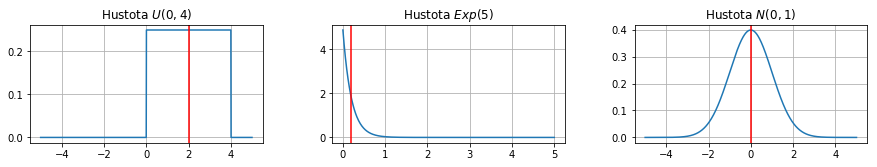

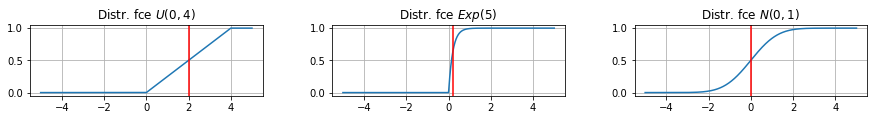

In [3]:
x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(15,5))
plt.subplot(2,3,1)
plt.plot(x, uniform.pdf(x, 0, 4))
plt.axvline(uniform.mean(0, 4), color='r')
plt.title(r'Hustota $U(0, 4)$')
plt.subplot(2,3,2)
plt.plot(x[x>0], expon.pdf(x[x>0], scale=1/5))
plt.axvline(expon.mean(scale=1/5), color='r')
plt.title(r'Hustota $Exp(5)$')
plt.subplot(2,3,3)
plt.plot(x, norm.pdf(x, loc=0, scale=1))
plt.axvline(norm.mean(0, 4), color='r')
plt.title(r'Hustota $N(0,1)$')
plt.figure(figsize=(15,3))
plt.subplot(2,3,4)
plt.plot(x, uniform.cdf(x, 0, 4))
plt.axvline(uniform.mean(0, 4), color='r')
plt.title(r'Distr. fce $U(0, 4)$')
plt.subplot(2,3,5)
plt.plot(x, expon.cdf(x, scale=1/5))
plt.axvline(expon.mean(scale=1/5), color='r')
plt.title(r'Distr. fce $Exp(5)$')
plt.subplot(2,3,6)
plt.plot(x, norm.cdf(x, loc=0, scale=1))
plt.axvline(norm.mean(0, 4), color='r')
plt.title(r'Distr. fce $N(0,1)$')
plt.show()

## Rovnoměrné rozdělení (spojité) $U(a,b)$

[Rovnoměrné rozdělení](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)) popisuje jevy, jejichž pravděpodobnost je rovnoměrně rozdělena na intervalu [a,b].

### Hustota pravděpodobnosti
$$
f(x) = \begin{cases}\frac{1}{b-a} & \text{pro}\ x\in [a,b], \\ 0 & \text{jinde.}\end{cases}
$$

### Momenty
$$
EX = \frac{a+b}{2}, \qquad \operatorname{var}X = \frac{(b-a)^2}{12}.
$$

V následujícím kódu můžete zkusit měnit parametry $a, b$ a sledovat, co to dělá s hustotou a distribuční funkcí.

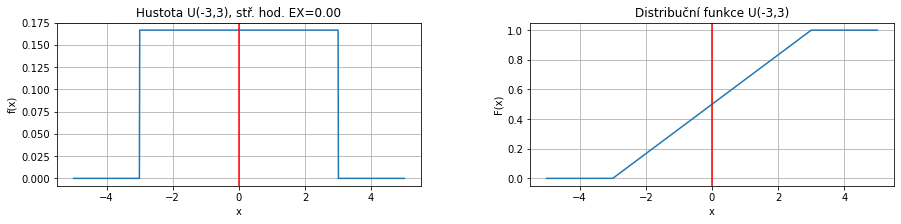

In [33]:
a, b = (-3, 3)   ### Zkuste měnit

scale = np.abs(b-a)
x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.plot(x, uniform.pdf(x, a, scale=scale))
plt.axvline(uniform.mean(a, scale=scale), color='r')
plt.title('Hustota U({0},{1}), stř. hod. EX={2:.2f}'.format(a, b, uniform.mean(a,scale=scale)))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.subplot(1,2,2)
plt.plot(x, uniform.cdf(x, a, scale=scale))
plt.axvline(uniform.mean(a, scale=scale), color='r')
plt.title('Distribuční funkce U({0},{1})'.format(a, b))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()

### Aplikace
Uvažujme, že máme odhadnout Ludolfovo číslo $\pi=3.1415\ldots$ náhodným vzorkováním (metodou Monte Carlo :). Vezmeme si k tomu pár faktů:

1. Plocha kruhu: $S_\circ = \pi r^2$. Zvolíme-li $r=1$, zbyde $S_\circ = \pi$.
2. Čtvrtina kruhu = vyšší efektivita vzorkování. $S_{\frac{\circ}{4}} = \frac{\pi}{4}$.
3. Čtvrtkruh vepíšeme do čtverce o straně $r=1$, tedy o ploše $S_\square = r^2 = 1$.
4. Pravděpodobnost, že náhodný vzorek rovnoměrně padající do čtverce spadne i do kruhu je 

$$P(x_i \in S_{\frac{\circ}{4}}) = \frac{S_{\frac{\circ}{4}}}{S_\square} = \frac{\pi}{4}.$$

Z toho plyne, že $\pi = 4 \cdot P(x_i \in S_{\frac{\circ}{4}})$. Navzorkujeme tedy z rovnoměrného rozdělení (resp. ze dvou rovnoměrných rozdělení $U[0,1]$ - pro každou osu) a spočítáme poměr vzorků uvnitř čtvrtkruhu ke všem vzorkům - ten odpovídá pravděpodobnosti $P(x_i \in S_{\frac{\circ}{4}})$. Pak už jenom násobíme čtyřmi.

![mc](img/mc-kruh.png)

In [34]:
def odhad_pi(nsamples):
    samples = np.random.uniform(low=0, high=1, size=(nsamples, 2))
    samples_dist_from_origin = np.sqrt((samples**2).sum(axis=1))
    samples_in_circle = np.sum(samples_dist_from_origin <= 1)
    probability = samples_in_circle / nsamples
    pi = 4 * probability
    return pi

nsamples = 1e8
print('Odhad pi: {0:.5f}'.format(odhad_pi(int(nsamples))))

Odhad pi: 3.14172


## Exponenciální rozdělení $\mathcal{E}xp(\lambda)$

[Exponenciální rozdělení](https://en.wikipedia.org/wiki/Exponential_distribution) s parametrem $\lambda>0$ (angl. rate, počet událostí za jednotku času) popisuje nezápornou náhodnou veličinu $X\geq 0$. Používá se např. pro modelování času mezi dvěma událostmi s Poissonovým rozdělením (např. uvolnění částice při rozpadu atomu) či dotazy na server. Podobně, jako geometrické v diskrétním světě, je ve spojitém světě toto rozdělení **bezpaměťové**, tj. uvažujeme-li čas $T\sim\mathcal{E}xp(\lambda)$, pak

$$
P(T>t+s|T>s) = P(T>t).
$$

(dokažte pomocí podmíněných pravděpodobností - je to jednoduché).

### Hustota pravděpodobnosti
$$
f(x) = \lambda e^{-\lambda x}, \qquad \lambda>0.
$$

### Momenty
$$
EX = \frac{1}{\lambda}, \qquad \operatorname{var}X = \frac{1}{\lambda^2}.
$$

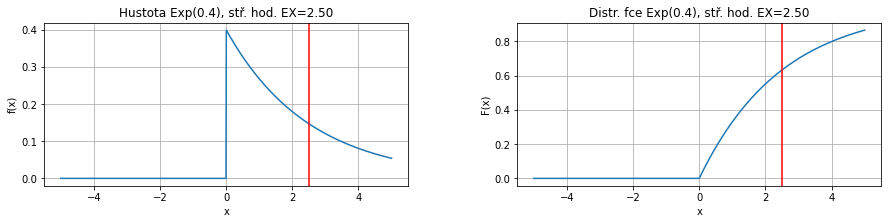

In [40]:
lambd = .4   ### Zkuste měnit

x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.plot(x, expon.pdf(x, scale=1/lambd))
plt.axvline(expon.mean(scale=1/lambd), color='r')
plt.title('Hustota Exp({0}), stř. hod. EX={1:.2f}'.format(lambd, expon.mean(scale=1/lambd)))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.subplot(1,2,2)
plt.plot(x, expon.cdf(x, scale=1/lambd))
plt.axvline(expon.mean(scale=1/lambd), color='r')
plt.title('Distr. fce Exp({0}), stř. hod. EX={1:.2f}'.format(lambd, expon.mean(scale=1/lambd)))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()

### Příklad

Máme klastr redundantních serverů zpracovávajících elektronické platby. Víme, že mimo špičku chodí na jednotlivé servery v průměru 10 transakcí za sekundu. Označíme čas $T$ mezi jednotlivými transakcemi. Určete a **interpretujte**:

1. $\lambda$
2. Střední hodnotu a rozptyl.
3. $P(T<\frac{1}{10}s)$.
4. $P(T>\frac{1}{10}s)$.
5. $P\left(\frac{1}{10}<T<\frac{2}{10}\right)$
6. $P\left(T>\frac{5}{10}\big|T>\frac{1}{10}\right)$

Odpovědi:

Vidíme $P(T<t)$ a $P(T>t)$, budeme tedy potřebovat distribuční funkci a funkci přežití. Tak si je spočteme :)

Distribuční funkce:

$$
F(t) = \int_{-\infty}^t f(u)du =
\begin{cases}
0 &\text{pro}\ t<0,\\
\int_{0}^{t} f(u)du = \int_0^t \lambda e^{-\lambda u}du = \left[- e^{-\lambda u}\right]_0^t = 1-e^{-\lambda t} &\text{pro}\ t\geq 0.
\end{cases}
$$

Funkce přežití:

$$
S(t) = P(T>t) =1-F(t) = e^{-\lambda t}.
$$

1. $\lambda = 10$
2. $ET = \frac{1}{10}$ a $\operatorname{var}T = \frac{1}{100}$.
3. $F\left(\frac{1}{10}\right) = 1-e^{-1}$
4. $S\left(\frac{1}{10}\right) = e^{-1}$
5. $F\left(\frac{2}{10}\right) - F\left(\frac{1}{10}\right) = e^{-1}-e^{-2}$.
6. 

$$
P\left(T>\frac{5}{10}\bigg|T>\frac{1}{10}\right)
= \frac{P\left(\left\{T>\frac{5}{10}\right\} \cap \left\{T>\frac{1}{10}\right\}\right)}
{P\left(T>\frac{1}{10}\right)}
=\frac{P\left(T>\frac{5}{10}\right)}
{P\left(T>\frac{1}{10}\right)}
= \frac{e^{-5}}{e^{-1}} = e^{-4}.
$$

Poslední bod je navíc jen prosté využití výše uvedené bezpaměťovosti

$$
P(T>t+s|T>s) = P(T>t),
$$

tedy můžeme psát přímočaře

$$
P\left(T>\frac{5}{10}\bigg|T>\frac{1}{10}\right) = P\left(T>\frac{4}{10} + \frac{1}{10}\bigg|T>\frac{1}{10}\right) =
P\left(T>\frac{4}{10}\right) = S\left(\frac{4}{10}\right) = e^{-4}.
$$

## Normální rozdělení $\mathcal{N}(\mu, \sigma^2)$

[Normální - též Gaussovo či gaussovské - rozdělení](https://en.wikipedia.org/wiki/Normal_distribution) je jedno z nejpopulárnějších vůbec. Má dva parametry - **střední hodnotu** $\mu\in\mathbb{R}$ a **rozptyl** $\sigma^2$, které jsou zároveň $EX$  a $\operatorname{var}X$. Náhodná veličina $X\in\mathbb{R}$.

Odmocnina rozptylu - $\sigma$ - se nazývá **směrodatnou odchylkou**. Tu známe ze zápisu kde je $\pm$, například v $(3\pm 0.001) \text{kg}$ je řečeno, že něco váží 3kg a zpravidla 3 směrodatné odchylky jsou 0.001kg. Časem se dozvíme, že 3 směrodatné odchylky na každou stranu od střední hodnoty pokrývají naprostou většinu hodnot (konkrétně pro 1, 2 a $3\sigma$ je to [68-95-99.7%](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)).

Normální rozdělení $\mathcal{N}(0, 1)$ se nazývá **standardní normální rozdělení**. Veličiny se často transformují tak, aby měly stejné momenty a porovnávají s tímto rozdělením - normalita je prostě populární :) Jednou z obrovských výhod normálního rozdělení je, že se s ním velmi dobře počítá.


### Hustota pravděpodobnosti
$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x-\mu)^2}, \qquad \mu\in\mathbb{R}, \sigma^2>0.
$$

### Momenty
$$
EX = \mu, \qquad \operatorname{var}X = \sigma^2.
$$

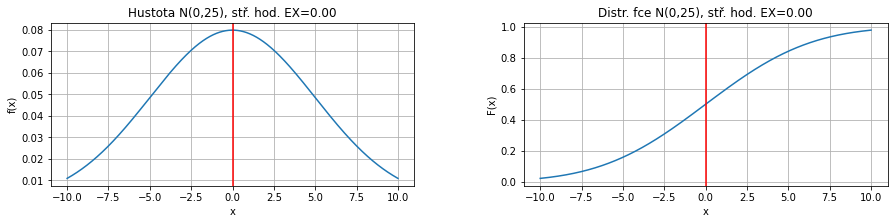

In [13]:
mi = 0    ### Zkuste měnit
sigma = 5 ### Zkuste měnit

x = np.linspace(-10, 10, 1000)
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.plot(x, norm.pdf(x, loc=mi, scale=sigma))
plt.axvline(mi, color='r')
plt.title('Hustota N({0},{1}), stř. hod. EX={2:.2f}'.format(mi, sigma**2, mi))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.subplot(1,2,2)
plt.plot(x, norm.cdf(x, loc=mi, scale=sigma))
plt.axvline(mi, color='r')
plt.title('Distr. fce N({0},{1}), stř. hod. EX={2:.2f}'.format(mi, sigma**2, mi))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()

Normální rozdělení vystihuje mnoho reálných dat, samozřejmě s přihlédnutím na jistá zjednodušení. Např. IQ se uvažuje rozdělené $\mathcal{N}(100, 15^2)$. Jelikož ale normální rozdělení má nosič hustoty (tj. množinu, kde je $f(x)>0$) celou reálnou osu, platí, že pokud by IQ bylo přesně normální, musí být nenulová i pravděpodobnost určitých extrémů. Zkusme:

In [8]:
mi = 100
sigma = 15
print('P(IQ<0) = {0:.2e}'.format(norm.cdf(0, loc=100, scale=15)))
print('P(IQ<30) = {0:.2e}'.format(norm.cdf(30, loc=100, scale=15)))
print('P(IQ<50) = {0:.2e}'.format(norm.cdf(50, loc=100, scale=15)))
print('P(IQ>180) = {0:.2e}'.format(1-norm.cdf(180, loc=100, scale=15)))

P(IQ<0) = 1.31e-11
P(IQ<30) = 1.53e-06
P(IQ<50) = 4.29e-04
P(IQ>180) = 4.82e-08


Teoreticky bychom tedy mohli potkat člověka se záporným IQ. Tyto nedokonalosti lze řešit ořezáním konců a renormalizací, ovšem takové rozdělení je z hlediska dalšího počítání peklo. Tak se raději smíříme s nedokonalostmi modelu :)

### Přehled uvedených spojitých rozdělení

| Rozdělení | Parametry | $f(x)$ | $\operatorname{E}X$ | $\operatorname{var}X$ | `scipy` |
|---|---|---|---|---|---|
|[Rovnoměrné](https://en.wikipedia.org/wiki/Uniform_distribution_&#040;continuous&#041;) | $a,b\in\mathbb{R}$ | $\begin{cases}\frac{1}{b-a} & \text{pro}\ x\in [a,b], \\ 0 & \text{jinde.}\end{cases}$ | $\frac{a+b}{2}$ | $\frac{(b-a)^2}{12}$ | [`uniform`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html) |
|[Exponenciální](https://en.wikipedia.org/wiki/Exponential_distribution) | $\lambda>0$ | $\lambda e^{-\lambda x}$ | $\frac{1}{\lambda}$ | $\frac{1}{\lambda^2}$ | [`expon`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html)|
|[Normální](https://en.wikipedia.org/wiki/Normal_distribution)| $\mu\in\mathbb{R},\sigma^2>0$ | $\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x-\mu)^2}$ | $\mu$ | $\sigma^2$ | [`norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)|


---

---

# Příklady ze slajdů BI-PST

## 5.1
**Uvažujme funkci**

$$
F_X(x) =
\begin{cases}
\frac{x^2}{2} &\text{pro}\ x\in[0,1), \\
2x - \frac{x^2}{2} - 1 &\text{pro}\ x\in[1,2],\\
0 &\text{jinde}.
\end{cases}
$$

**a) Je funkce $F_X(x)$ distribuční funkcí? Pokud ne, je možné ji částečně předefinovat tak, aby byla? V kladném případě uvažujte do dalších bodů tuto předefinovanou variantu.**

Připomeňme, že vlastnosti d.f. jsou (i) monotónie - funkce je neklesající a (ii) $\lim_{x\to \infty} F_X(x) = 1$. Je tedy potřeba ji předefinovat:

$$
F_X(x) =
\begin{cases}
0 &\text{pro}\ x<0,\\
\frac{x^2}{2} &\text{pro}\ x\in[0,1), \\
2x - \frac{x^2}{2} - 1 &\text{pro}\ x\in[1,2],\\
1 &\text{pro}\ x>2.
\end{cases}
$$

![graf](img/51graf.png)

**b) Jedná se o spojitou náhodnou veličinu?**

Ano, viz přednáška. Distribuční funkce je všude spojitá, $\lim_{x\to c^-} F(x) = \lim_{x\to c^+} F(x)$ pro všechna $c\in D(f)$ kde $D$ je definiční obor.

**c) Najděte její hustotu.**

Jednoduše derivací zjistíme, že

$$
f_X(x) =
\begin{cases}
0 &\text{pro}\ x<0,\\
x &\text{pro}\ x\in[0,1), \\
2 - x &\text{pro}\ x\in[1,2],\\
0 &\text{pro}\ x>2.
\end{cases}
$$

**d) Najděte pravděpodobnost $P\left(X\in\left[\frac{1}{2}, \frac{3}{2}\right]\right)$.**

$$
P\left(X\in\left[\frac{1}{2}, \frac{3}{2}\right]\right) = F\left(\frac{3}{2}\right) - F\left(\frac{1}{2}\right) = \frac{7}{8} - \frac{1}{8} = \frac{3}{4}.
$$

## 5.2

**Nechť $X$ je spojitá náhodná veličina s hustotou**
![5.2](img/52.jpg)

**a) Najděte hodnotu konstanty $h$.**

Víme, že hustota pravděpodobnosti se musí integrovat do jedné. Tedy

$$
\int_{-\infty}^{\infty} f(x) dx =
\underbrace{\frac{1}{2} \cdot 1 \cdot h}_{\text{trojúhelník}} + 
\underbrace{1 \cdot h}_{\text{obdélník}} = 1 \Rightarrow h=\frac{2}{3}.
$$

**b) Najděte analytické vyjádření hustoty $f(x)$.**

$$
f(x) =
\begin{cases}
\frac{2}{3}x &\text{pro}\ x\in[0,1),\\
\frac{2}{3}  &\text{pro}\ x\in[1,2],\\
0 &\text{jinde}.
\end{cases}
$$

**c) Spočtěte střední hodnotu $EX$ a rozptyl $\operatorname{var}X$.**

$$
EX = \int x f(x) dx = \int_0^1 x\cdot \frac{2}{3}x dx + \int_1^2 x\cdot \frac{2}{3} dx = \frac{11}{9}.
$$

Protože $\operatorname{var}X = EX^2 - (EX)^2$, spočteme si ještě jednu střední hodnotu,

$$
EX^2 = \int x^2 f(x)dx = \int_0^1 x^2\cdot \frac{2}{3}x dx + \int_1^2 x^2\cdot \frac{2}{3} dx = \frac{31}{18}.
$$

Tedy

$$
\operatorname{var}X = \frac{31}{18} - \left(\frac{11}{9}\right)^2 = \frac{37}{162}.
$$

## 5.3

Mějme funkci $g:\mathbb{R}\to\mathbb{R}$ zadanou následovně:

$$
g(x) =
\begin{cases}
2x &\text{pro}\ x\in(0,1],\\
4-2x &\text{pro}\ x\in(1,2],\\
0 &\text{pro}\ x\in(-\infty, 0]\cup (2, \infty).
\end{cases}
$$

**a) Najděte takovou hodnotu $a\in\mathbb{R}$, aby funkce $f(x) = a\cdot g(x)$ byla hustotou pravděpodobnosti nějaké náhodné veličiny.**

Opět budeme hledat $a$ takové, aby integrál $f(x)$ byl roven jedné:

$$
\int_{-\infty}^\infty a\cdot g(x)dx = 
a \left[ \int_1^2 4-2x dx + \int_0^1 2x dx\right] = 1 \Longrightarrow a=\frac{1}{2}.
$$

**b) Najděte střední hodnotu a rozptyl náhodné veličiny s hustotou pravděpodobnosti $f(x)$.**

Budeme postupovat stejně jako v předchozím příkladu, spočteme $EX$ a $EX^2$:

$$
\begin{aligned}
EX &= \int_{-\infty}^\infty x f(x) dx = \int_0^1 x\cdot x dx + \int_1^2 x(2-x)dx = 1,\\
EX^2 &= \int_{-\infty}^\infty x^2 f(x) dx = \int_0^1 x^2\cdot x dx + \int_1^2 x^2(2-x)dx = \frac{7}{6},\\
\operatorname{var}X &= EX^2 - (EX)^2 = \frac{7}{6} -1 = \frac{1}{6}.
\end{aligned}
$$

# 5.4

**Máme vypozorováno, že průměrná délka intervalu mezi příjezdy tramvaje č. 20 na zastávku Vítězné náměstí je ve špičce 5 minut. Označme $T$ náhodnou veličinu, která měří délku intervalu mezi dvěma příjezdy tramvaje.**

**a) Modelujte $T$ pomocí rovnoměrného, exponenciálního a normálního rozdělení tak, aby $ET = 5$min.**

Musíme nastavit parametry jednotlivých rozdělení tak, aby byla střední hodnota 5:

$$
\begin{aligned}
T &\sim \mathcal{U}(0, 10), \\
T &\sim \mathcal{E}xp\left(\frac{1}{5}\right),\\
T &\sim \mathcal{N}(5, \sigma^2).
\end{aligned}
$$

**b) Jaký je rozptyl $T$ pro jednotlivá rozdělení?**

Jednoduchým dosazením do vzorečků pro rozptyl postupně dostaneme $\frac{25}{3}, 25$ a $\sigma^2$.

**c) Jaká je pravděpodobnost, že interval bude delší než 6 minut, tj. $P(T>6)$?**

Nejprve obecně, víme, že $F(X) = P(X\leq x)$ a tedy $P(X>x) = 1-F(x) = S(x)$, což je tzv. funkce přežití (survival function). Určíme je pro rovnoměrné a exponenciální rozdělení, normální nás čeká v 6. cvičení.

*Rovnoměrné rozdělení $\mathcal{U}(a,b)$:*

$$
F(x) =
\begin{cases}
0 &\text{pro}\ x<a,\\
\int_{a}^x \frac{1}{b-a}dt = \frac{x-a}{b-a} &\text{pro}\ x\in[a,b],\\
1 &\text{pro}\ x>b.
\end{cases}
$$

Tedy $P(T>6) = 1-F(6) = 1-\frac{6}{10} = 0.4$.

*Exponenciální rozdělení $\mathcal{E}xp(\lambda)$:*

$$
F(x) = \int_{-\infty}^{x} = \int_{0}^x \lambda e^{-\lambda t} dt = \left[-e^{-\lambda t}\right]_0^x = 1 - e^{-\lambda x}.
$$

Tedy $P(T>6) = 1-F(6) = e^{-\frac{6}{5}}$.

## 5.5

**Uvažujme náhodnou veličinu $T\sim \mathcal{E}xp(\lambda)$ z předchozího příkladu.**

**a) Nalezněte předpis pro distribuční funkci a funkci přežití $T$.**

Distribuční funkce (budu značit $X$ místo $T$):

$$
F(x) = \int_{-\infty}^x f(x)dx =
\begin{cases}
0 &\text{pro}\ x<0,\\
\int_{0}^{x} f(x)dx = \int_0^x \lambda e^{-\lambda t}dt = \left[ - e^{-\lambda t}\right]_0^x = 1-e^{-\lambda x} &\text{pro}\ x\geq 0.
\end{cases}
$$

Funkce přežití:

$$
S(x) = P(X>x) =1-F(x) = e^{-\lambda x}.
$$

**b) Spočtěte pravděpodobnost, že délka intervalu mezi příjezdy bude rovna 5 min., tj. $P(T=5)$.**

Pravděpodobnost spojité n.v. v bodě je rovna 0 (jaká je pravděpodobnost, že to bude s nekonečnou přesností právě 5 minut? ;))

**c) Spočtěte pravděpodobnost, že délka intervalu mezi příjezdy bude větší než 5 minut, tj. $P(T>5)$.**

Použitím funkce přežití dostaneme $P(T>5) = e^{-\frac{5}{5}} = e^{-1}$.

**d) Jaká je pravděpodobnost, že interval bude delší než 6 minut za podmínky, že čekáme už déle než 5 minut, tj. $P(T>6|T>5)$?**

Podmíněná pravděpodobnost:

$$
P(T>6|T>5) = \frac{P\left( \{T>6\}\cap \{T>5\} \right)}{P(T>5)}
=\frac{P(T>6)}{P(T>5)} = \frac{e^{-\frac{6}{5}}}{e^{-\frac{5}{5}}} = e^{-\frac{1}{5}}.
$$

**e) Jaká je pravděpodobnost, že interval bude nejvýše 6 minut za podmínky, že už čekáme déle než 5 minut, tj. $P(T\leq 6|T>5)$?**

Podobně jako v předchozím případě,

$$
P(T\leq 6|T>5) = \frac{P\left( \{T\leq 6\}\cap \{T>5\} \right)}{P(T>5)}=
\frac{P(T\in(5,6])}{P(T>5)} = \frac{F(6) - F(5)}{S(5)} = 1-e^{-\frac{1}{5}}.
$$

## 5.6

**Ukažte bezpaměťovost exponenciálního rozdělení, tj. že pro $T\sim\mathcal{E}xp(\lambda)$ platí**

$$
P(T>t+s|T>s) = P(T>t).
$$

To uděláme snadno podobně, jako v předchozím případě v posledních dvou bodech. Prostě rozepíšeme podmíněné pravděpodobnosti, nalezneme průnik a ono to vypadne samo :) Zkuste!